In [1]:
import numpy as np
import matplotlib.pyplot as plt

def is_invertible(a):
    return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

In [2]:
x = []
t = []

K = 3

# class 1
for i in range(50):
    e_x = np.random.normal()
    e_y = np.random.normal()
    p = (-5+e_x, -5+e_y)
    x.append(p)
    t.append((1,0,0))

# class 2
for i in range(30):
    e_x = np.random.normal()
    e_y = np.random.normal()
    p = (e_x, e_y)
    x.append(p)
    t.append((0,1,0))

# class 3 = K
for i in range(40):
    e_x = np.random.normal()
    e_y = np.random.normal()
    p = (5+e_x, 5+e_y)
    x.append(p)
    t.append((0,0,1))

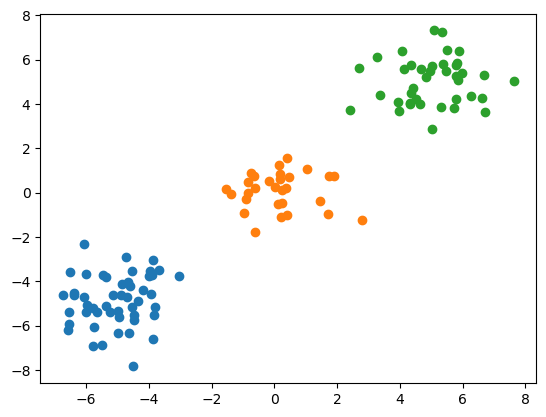

In [3]:
X = [_[0] for _ in x]
Y = [_[1] for _ in x]
plt.scatter(X[:49], Y[:49])
plt.scatter(X[50:79], Y[50:79])
plt.scatter(X[80:119], Y[80:119])
plt.show()

In [4]:
phi = [lambda v: 1, lambda v: v[0], lambda v: v[1]]
M = len(phi)
N = len(x)
Phi = np.zeros((N, M))
for n in range(N):
    for m in range(M):
        Phi[n][m] = phi[m](x[n])

In [12]:
w = np.random.rand(K, M)

# Newton
for i in range(100):
    a = np.zeros((N, K))
    for n in range(N):
        for k in range(K):
            a[n][k] = np.inner(w[k], Phi[n])
    
    y = np.zeros((N, K))
    for n in range(N):
        for k in range(K):
            d = 0
            for j in range(K):
                d += np.exp(a[n][j])
            if np.isfinite(d):
                y[n][k] = np.exp(a[n][k])/d
            else:
                y[n][k] = 0

    grad = np.zeros((K, M))
    for j in range(K):
        for n in range(N):
            grad[j] += (y[n][j]-t[n][j]) * Phi[n]

    print(np.linalg.norm(grad))
    H = np.zeros((K, K))
    for j in range(K):
        for k in range(K):
            s = 0
            for n in range(N):
                s += y[n][k]*(np.identity(M)[k][j] - y[n][j])*np.inner(Phi[n], Phi[n])
            H[j][k] = s

    try:
        H_inv = np.linalg.inv(H)
    except:
        break
    
    dw = np.matmul(H_inv, grad)
    w -= dw

558.2073332169837
178.32332058042672
51.39345875256113
20.558688832353397
17.965622444228398
16.619275583154174
15.531887269739883
14.403402993136078
13.400114375127155
12.581769786507886
11.653098615475002
11.73169547177697
10.100555195211596
9.50985001278166
9.734793944739556


[[ 0.505155   -0.69159032 -1.05577158]
 [ 2.52701671  0.00489336 -0.21987978]
 [ 0.80637534  0.48779074  0.52990489]]


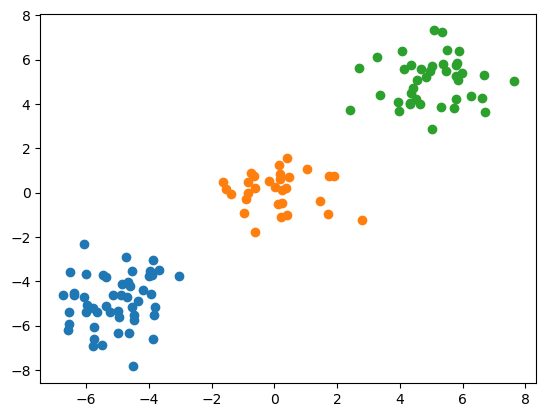

In [13]:
print(w)

C1 = []
C2 = []
C3 = []


for p in x:
    a0 = np.inner(w[0], [1, p[0], p[1]])
    a1 = np.inner(w[1], [1, p[0], p[1]])
    a2 = np.inner(w[2], [1, p[0], p[1]])
    s = np.exp(a0) + np.exp(a1) + np.exp(a2)
    v0 = np.exp(a0)/s
    v1 = np.exp(a1)/s
    v2 = np.exp(a2)/s
    v = [v0, v1, v2]
    c = v.index(max(v))
    if c == 0:
        C1.append(p)
    elif c == 1:
        C2.append(p)
    elif c == 2:
        C3.append(p)

plt.scatter([_[0] for _ in C1], [_[1] for _ in C1])
plt.scatter([_[0] for _ in C2], [_[1] for _ in C2])
plt.scatter([_[0] for _ in C3], [_[1] for _ in C3])
plt.show()

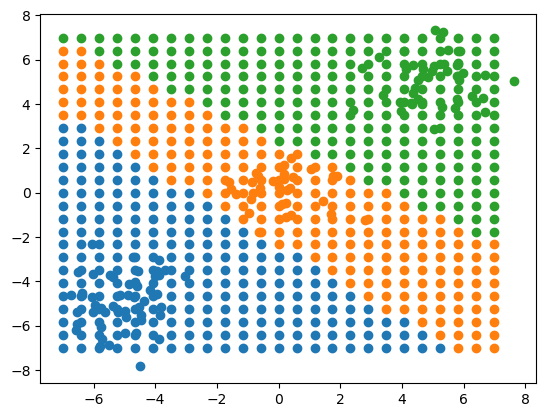

In [14]:
for a in np.linspace(-7, 7, 25):
    for b in np.linspace(-7, 7, 25):
        p = (a, b)
        a0 = np.inner(w[0], [1, p[0], p[1]])
        a1 = np.inner(w[1], [1, p[0], p[1]])
        a2 = np.inner(w[2], [1, p[0], p[1]])
        s = np.exp(a0) + np.exp(a1) + np.exp(a2)
        v0 = np.exp(a0)/s
        v1 = np.exp(a1)/s
        v2 = np.exp(a2)/s
        v = [v0, v1, v2]
        c = v.index(max(v))
        if c == 0:
            C1.append(p)
        elif c == 1:
            C2.append(p)
        elif c == 2:
            C3.append(p)

plt.scatter([_[0] for _ in C1], [_[1] for _ in C1])
plt.scatter([_[0] for _ in C2], [_[1] for _ in C2])
plt.scatter([_[0] for _ in C3], [_[1] for _ in C3])
plt.show()